In [1]:
#import required libraries
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#specify the path where csv files are located
path = "csv/"
read_files = os.listdir(path)
read_files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
#Create an empty dataframe to combine data from all csv file
combined_df = pd.DataFrame()
for file in read_files:
#read each csv file and append the data to the empty data frame
    df = pd.read_csv(path+file)
    combined_df = combined_df.append(df, ignore_index=True)
combined_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,9/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354.0,iPhone,1.0,700.00,9/1/2019 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355.0,iPhone,1.0,700.00,9/23/2019 7:39,"220 12th St, San Francisco, CA 94016"
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,9/19/2019 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
#dropping all rows with missing values
combined_df.dropna(inplace=True, axis=0, how='all')
combined_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,9/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354.0,iPhone,1.0,700.00,9/1/2019 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355.0,iPhone,1.0,700.00,9/23/2019 7:39,"220 12th St, San Francisco, CA 94016"
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,9/19/2019 17:30,"511 Forest St, San Francisco, CA 94016"


In [5]:
#convert 'Quantity Ordered' and 'Price Each' columns to numeric data type
combined_df['Quantity Ordered'] = pd.to_numeric(combined_df['Quantity Ordered'])
combined_df['Price Each'] = pd.to_numeric(combined_df['Price Each'])
combined_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,9/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354.0,iPhone,1.0,700.00,9/1/2019 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355.0,iPhone,1.0,700.00,9/23/2019 7:39,"220 12th St, San Francisco, CA 94016"
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,9/19/2019 17:30,"511 Forest St, San Francisco, CA 94016"


In [6]:
#convert 'Order Date' column to datetime data type
combined_df['Order Date'] = pd.to_datetime(combined_df['Order Date'])
# extract 'Month' from the 'Order Date' column and convert it to numeric data type
combined_df.insert(4,'Month',combined_df['Order Date'].dt.strftime('%m').astype(int))
combined_df

,Order ID,Product,Quantity Ordered,Price Each,Month,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,4,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1.0,11.99,4,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,9,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186846,259354.0,iPhone,1.0,700.00,9,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355.0,iPhone,1.0,700.00,9,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,9,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [7]:
#extract 'City' from the 'Purchase Address' column and add it as a new column
City=[] #ceate an empty list
for i in combined_df['Purchase Address'].values.astype(str):
    value = i.split(',')
    City.append(value[1])
combined_df.insert(7,'City', City) #list is added to the dataframe
combined_df


,Order ID,Product,Quantity Ordered,Price Each,Month,Order Date,Purchase Address,City
0,176558.0,USB-C Charging Cable,2.0,11.95,4,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston
3,176560.0,Google Phone,1.0,600.00,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
4,176560.0,Wired Headphones,1.0,11.99,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
5,176561.0,Wired Headphones,1.0,11.99,4,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles
...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,9,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Los Angeles
186846,259354.0,iPhone,1.0,700.00,9,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",San Francisco
186847,259355.0,iPhone,1.0,700.00,9,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",San Francisco
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,9,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",San Francisco


In [8]:
Quantity_Ordered = combined_df['Quantity Ordered']
print('Sum is :',Quantity_Ordered.sum()) #prints sum

Sum is : 209079.0


In [9]:
Quantity_Ordered = combined_df['Quantity Ordered']
print('Mean is :',Quantity_Ordered.mean())#prints mean

Mean is : 1.1243828986286637


In [10]:
Quantity_Ordered = combined_df['Quantity Ordered']
print('Standar Deviation is :',Quantity_Ordered.std())#prints quantity ordered

Standar Deviation is : 0.44279262402849096


In [11]:
Quantity_Ordered = combined_df['Quantity Ordered']
print('Skweness is :',Quantity_Ordered.skew())#prints skewness


Skweness is : 4.833164172577953


In [12]:
Quantity_Ordered = combined_df['Quantity Ordered']
print('Kurtosis is :',Quantity_Ordered.kurtosis())#prints Kurtosis

Kurtosis is : 31.82048892027536


In [13]:
#calculates the correlation between all the columns
correlation = combined_df.corr()
correlation

,Order ID,Quantity Ordered,Price Each,Month
Order ID,1.000000,0.000702,-0.002857,0.993063
Quantity Ordered,0.000702,1.000000,-0.148272,0.000791
Price Each,-0.002857,-0.148272,1.000000,-0.003375
Month,0.993063,0.000791,-0.003375,1.000000


In [14]:
# calculate the sales by multiplying 'Quantity Ordered' and 'Price Each' columns
combined_df['Sales'] = combined_df['Quantity Ordered']*combined_df['Price Each']
combined_df

,Order ID,Product,Quantity Ordered,Price Each,Month,Order Date,Purchase Address,City,Sales
0,176558.0,USB-C Charging Cable,2.0,11.95,4,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,23.90
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston,99.99
3,176560.0,Google Phone,1.0,600.00,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,600.00
4,176560.0,Wired Headphones,1.0,11.99,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,11.99
5,176561.0,Wired Headphones,1.0,11.99,4,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles,11.99
...,...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,9,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Los Angeles,8.97
186846,259354.0,iPhone,1.0,700.00,9,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",San Francisco,700.00
186847,259355.0,iPhone,1.0,700.00,9,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",San Francisco,700.00
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,9,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",San Francisco,379.99


In [15]:
# group the data by 'Month' column and calculate the sum of each column
combined_df.groupby('Month').sum()['Sales']

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

In [16]:
combined_df.groupby('Month').sum()

,Order ID,Quantity Ordered,Price Each,Sales
Month,,,,
1,1.421631e+09,10903.0,1811768.38,1822256.73
2,1.871053e+09,13449.0,2188884.72,2202022.42
3,2.564811e+09,17005.0,2791207.83,2807100.38
4,3.387347e+09,20558.0,3367671.02,3390670.24
5,3.345872e+09,18667.0,3135125.13,3152606.75
6,2.932976e+09,15253.0,2562025.61,2577802.26
7,3.284140e+09,16072.0,2632539.56,2647775.76
8,2.899374e+09,13448.0,2230345.42,2244467.88
9,2.948727e+09,13109.0,2084992.09,2097560.13


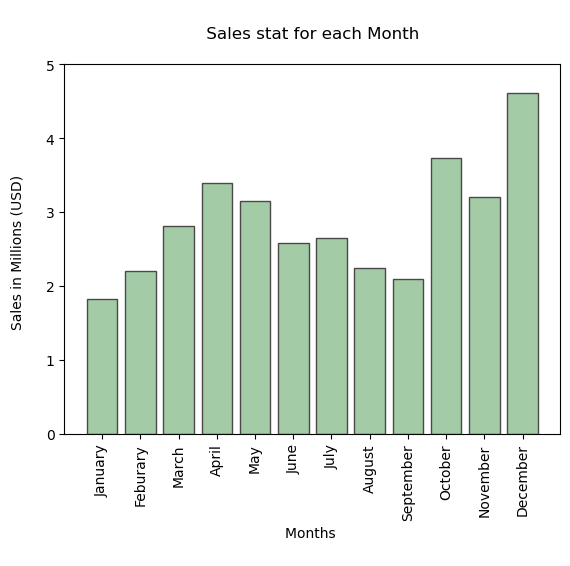

In [17]:
# plot a bar chart showing the sales for each month
months= ['January','Feburary','March','April','May','June','July','August','September','October','November','December']
results = combined_df.groupby('Month').sum()
plt.title("\n Sales stat for each Month \n")
plt.bar(months, results['Sales'],color="#A2CBA6", edgecolor='#4A4848')
plt.xticks(months, rotation = "vertical")
labels, location = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.xlabel('Months \n')
plt.ylabel('Sales in Millions (USD) \n')
plt.show()

In [18]:
# group the data by 'City' column and calculate the sum of each column
results2 = combined_df.groupby('City').sum()
results2

,Order ID,Quantity Ordered,Price Each,Month,Sales
City,,,,,
Atlanta,3.423838e+09,16602.0,2779908.20,104794,2795498.58
Austin,2.280982e+09,11153.0,1809873.61,69829,1819581.75
Boston,4.598265e+09,22528.0,3637409.77,141112,3661642.01
Dallas,3.415644e+09,16730.0,2752627.82,104620,2767975.40
Los Angeles,6.811085e+09,33289.0,5421435.23,208325,5452570.80
New York City,5.736334e+09,27932.0,4635370.83,175741,4664317.43
Portland,2.868861e+09,14053.0,2307747.47,87765,2320490.61
San Francisco,1.030444e+10,50239.0,8211461.74,315520,8262203.91
Seattle,3.406694e+09,16553.0,2733296.01,104941,2747755.48


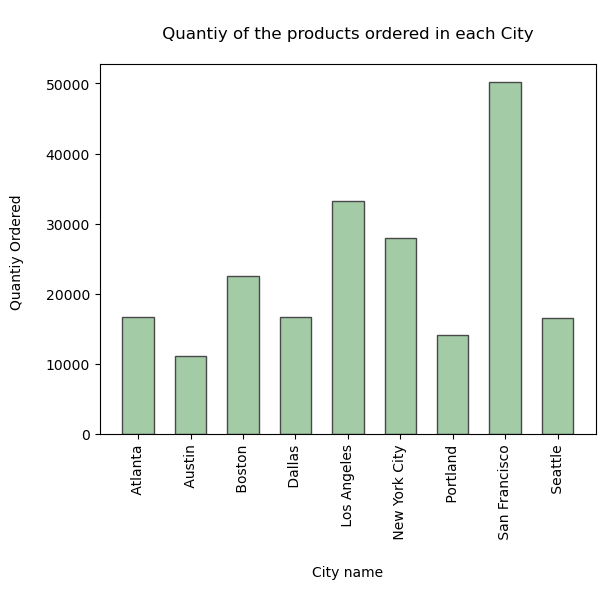

In [19]:
results2 = combined_df.groupby('City').sum()['Quantity Ordered']
#plot a bar chart showing the quantity of products ordered in each city
plt.title("\n Quantiy of the products ordered in each City \n")
plt.bar(results2.index, results2.values, color="#A2CBA6",edgecolor='#4A4848', width=0.6)
plt.xticks(rotation='vertical')
labels, location = plt.yticks()
plt.xlabel(' \nCity name')
plt.ylabel('Quantiy Ordered \n')
plt.show()


In [20]:
#Grouping the combined_df dataframe by product
product = combined_df.groupby('Product')
#Calculating the total quantity ordered for each product
quantity_ordered = product.sum()['Quantity Ordered']


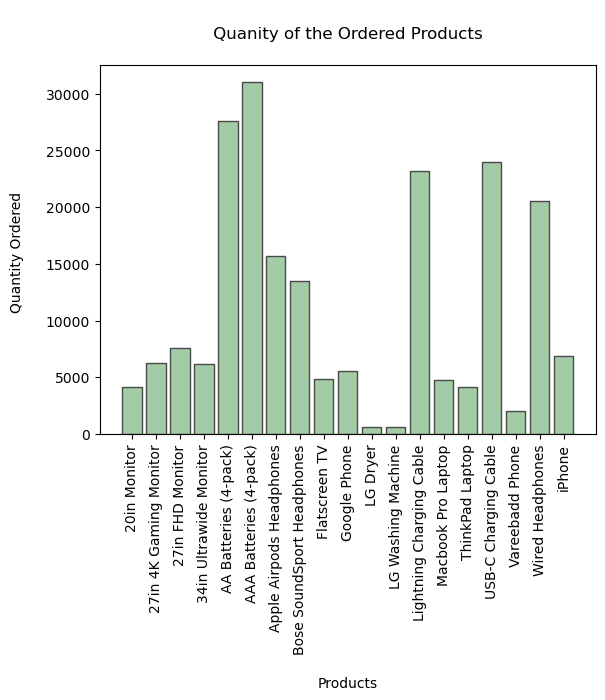

In [21]:
#Creating a bar plot to visualize the quantity of products ordered
plt.title("\n Quanity of the Ordered Products \n")
plt.bar(quantity_ordered.index , quantity_ordered.values,color="#A2CBA6",edgecolor='#4A4848' )
plt.ylabel('Quantity Ordered \n')
plt.xlabel('\nProducts')
plt.xticks(rotation='vertical')
plt.show()

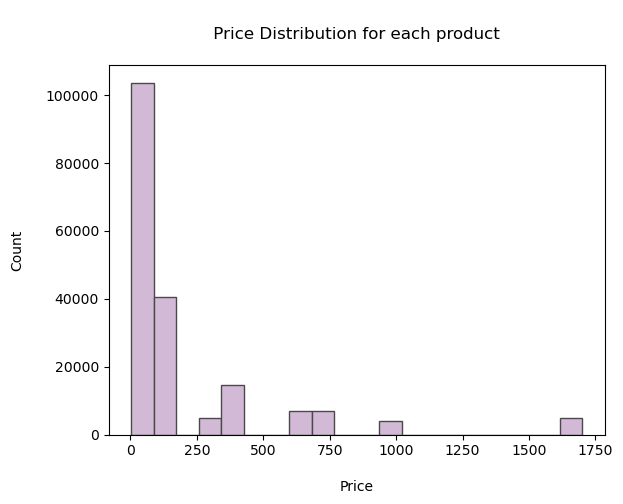

In [22]:
#Creating a histogram to visualize the price distribution for each product
plt.title("\n Price Distribution for each product \n")
plt.hist(combined_df['Price Each'],edgecolor='#4A4848', bins=20,color="#D2BAD7" )
plt.xlabel('\nPrice')
plt.ylabel('Count\n')
plt.show()